<a href="https://colab.research.google.com/github/roni762583/ReinforcementLearning/blob/main/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.layers import *
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential

from google.colab import drive

#!pip install ipython
#from Ipython.display import Image, display

In [ ]:
# ploting parameters
mpl.rcParams['figure.figsize'] = (10, 8)     # set figure size 
mpl.rcParams['axes.grid'] = False
# get datafile from google drive
drive.mount('/tick_data/')
!ls

Mounted at /tick_data/
sample_data


In [ ]:
# Load Data
df = pd.read_csv('/tick_data/MyDrive/tick_data/EURJPY_tick_data_to_20220908235959.426.txt')
# kill milliseconds since it gave format error and they are not needed now
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M%S') #.%f')

In [ ]:
print(df.tail())

                  datetime      bid  nominalSpread  hma1Moment  hma2Moment  \
205516 2022-09-08 23:59:55  144.025          0.007    0.000814   -0.000912   
205517 2022-09-08 23:59:57  144.025          0.006    0.001207   -0.000807   
205518 2022-09-08 23:59:58  144.019          0.010    0.001302   -0.000725   
205519 2022-09-08 23:59:59  144.019          0.008    0.000596   -0.000838   
205520 2022-09-08 23:59:59  144.020          0.007   -0.000005   -0.000924   

        hma3Moment  hma4Moment   delH1H4   delH1H2   delH2H3   delH3H4  \
205516   -0.000103    0.000073 -0.007600 -0.008397 -0.009845  0.010641   
205517   -0.000116    0.000070 -0.006464 -0.006382 -0.010536  0.010455   
205518   -0.000126    0.000067 -0.005229 -0.004356 -0.011135  0.010262   
205519   -0.000156    0.000062 -0.004695 -0.002923 -0.011816  0.010044   
205520   -0.000181    0.000057 -0.004757 -0.002003 -0.012559  0.009805   

         rH12H14   rH23H14   rH34H14   rH12H23   rH12H34   rH23H34  
205516  1.104772 

In [ ]:
# setting datetime as index column
df.set_index(df['datetime'], inplace = True)
df.drop('datetime', axis=1, inplace=True)
# get rid o NA rows
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.count()

bid              205476
nominalSpread    205476
hma1Moment       205476
hma2Moment       205476
hma3Moment       205476
hma4Moment       205476
delH1H4          205476
delH1H2          205476
delH2H3          205476
delH3H4          205476
rH12H14          205476
rH23H14          205476
rH34H14          205476
rH12H23          205476
rH12H34          205476
rH23H34          205476
dtype: int64

In [ ]:
# slice features and targets, convert to lists
features = df[['bid','nominalSpread','hma1Moment','hma2Moment','hma3Moment','hma4Moment','delH1H4','delH1H2',
               'delH2H3','delH3H4','rH12H14','rH23H14','rH34H14','rH12H23','rH12H34','rH23H34']].to_numpy().tolist()
shift = -100
target = df['bid'].shift(shift).tolist()
# multi_target = pd.concat([df['bid'].shift(-10), df['bid'].shift(-100), df['bid'].shift(-500)], axis=1).dropna().to_numpy().tolist()
print('features length: ', len(features))
print('target length: ', len(target))


features length:  205476
target length:  205476


In [ ]:
# RUN ONLY ONCE!

print(target[(len(target)+shift)])
print(target[(len(target)+shift -1)])
numberOfRowsToDrop = (len(target)+shift)
# Dropping last n rows that have na's
df.drop(df.tail(numberOfRowsToDrop).index, inplace = True)
print('-----------')
print(df.tail(2))

nan
144.02
-----------
                         bid  nominalSpread  hma1Moment  hma2Moment  \
datetime                                                              
2022-09-08 00:00:41  144.042          0.007   -0.000386   -0.000663   
2022-09-08 00:00:41  144.043          0.007   -0.000303   -0.000581   

                     hma3Moment  hma4Moment   delH1H4   delH1H2   delH2H3  \
datetime                                                                    
2022-09-08 00:00:41   -0.000050      -0.002  0.000552 -0.001461  0.003049   
2022-09-08 00:00:41   -0.000049       0.001 -0.000750 -0.001183  0.002517   

                      delH3H4   rH12H14   rH23H14   rH34H14   rH12H23  \
datetime                                                                
2022-09-08 00:00:41 -0.001036 -2.643988  5.518916 -1.874928 -0.479077   
2022-09-08 00:00:41 -0.002084  1.576468 -3.354428  2.777960 -0.469966   

                      rH12H34   rH23H34  
datetime                                 
2022-0

In [ ]:
# Create Normalization Layer
# https://www.youtube.com/watch?v=AFzmpEAMNp4
normalizer = layers.Normalization()
normalizer.adapt(features)

#Inputs = keras.input(shape=(573, 500))

# Create a model that 

NameError: ignored

In [ ]:
# timeseries generator for LSTM
# length - number of rows as input, after it works try length = 500
# sampling rate - step size as moving window, 1-continues
# batch size - during training increasing batch size can speed up learning
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1, stride=1)
#ts_generator[0]
len(ts_generator)

205470

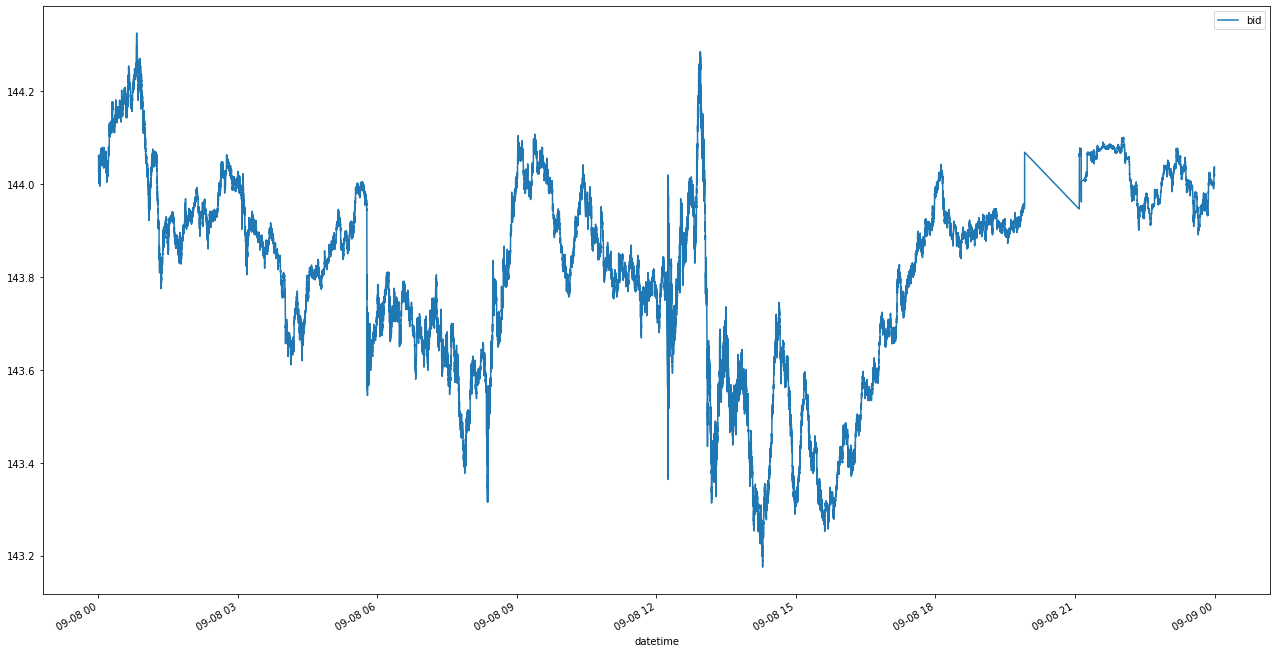

In [ ]:
# plot
mpl.rcParams['figure.figsize'] = (22, 12)
df[['bid']].plot()
#df[['bid','nominalSpread','hma1Moment','hma2Moment','hma3Moment','hma4Moment','delH1H4','delH1H2','delH2H3','delH3H4','rH12H14','rH23H14','rH34H14','rH12H23','rH12H34','rH23H34']].plot(subplots=True)

In [ ]:
df.columns
df.astype(float)
print(df.dtypes)

bid              float64
nominalSpread    float64
hma1Moment       float64
hma2Moment       float64
hma3Moment       float64
hma4Moment       float64
delH1H4          float64
delH1H2          float64
delH2H3          float64
delH3H4          float64
rH12H14          float64
rH23H14          float64
rH34H14          float64
rH12H23          float64
rH12H34          float64
rH23H34          float64
dtype: object


Reward Function Design considerations
from:
https://www.reddit.com/r/reinforcementlearning/comments/g20sq1/reward_function_design/

"... the observation is markovian, my states are stocking level, hourly price, demand etc."

"... the reward in RL needs to be for that step's action and nothing else. If it goes long 10, you have to reward it according to the fee and how much money that trade will make in the future all at once."

" If you want a closer, you may need hierarchical or multi-agent rl, one opening positions, another closing, because the reward can only represent one kind of action, I guess you could say. Maybe you can find a way to make it work though, I tried a long time and this is how I have made it work for me. You have an agent that opens trades, and I use a condition to close outside of rl. So the agent is rewarded by how well I think it’s idea is, say if it buys 10, costs 1, and could make 3 n steps later I reward it 2 that step."

from:
https://www.mlq.ai/deep-reinforcement-learning-trading-strategies-automl/

"A naive approach to the reward function would be driven by the absolute maximization of profits, although since that could lead to high risk trading you can use other performance metrics such as the Sharpe ratio"




In [ ]:
x = df[['bid', 'nominalSpread', 'hma1Moment']]#, 'hma2Moment', 'hma3Moment', 
        #'hma4Moment', 'delH1H4', 'delH1H2', 'delH2H3', 'delH3H4', 'rH12H14', 
        #'rH23H14', 'rH34H14', 'rH12H23', 'rH12H34', 'rH23H34']]
y = df['bid'].shift(20) # try train on bid 20 ticks ahead


trainX = x.iloc[20:150000]
testX = x.iloc[150001:]

trainy = y.iloc[20:150000]
testy = y.iloc[150001:]

In [ ]:
print(trainy.head())

datetime
2022-09-08 00:00:14    144.061
2022-09-08 00:00:15    144.062
2022-09-08 00:00:15    144.061
2022-09-08 00:00:15    144.060
2022-09-08 00:00:16    144.060
Name: bid, dtype: float64


In [ ]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=3))
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model.fit(trainX, trainy, epochs=500)

In [ ]:
print(model.predict([10.0, put in the 16 something inputs here ...]))

In [ ]:
#                                      Reinforcement Learning Example
#                                    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# from
# https://www.section.io/engineering-education/leveraging-openai-gym-and-the-anytrading-environment-for-trading/
# AnyTrading package
# https://github.com/AminHP/gym-anytrading

!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 gym-anytrading gym==0.19.0 stable-baselines #put older gym to fix min

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
#from keras import layers
#from keras.layers import *
#from keras.preprocessing.sequence import TimeseriesGenerator
#from keras.models import Sequential

from google.colab import drive


In [ ]:
import gym_anytrading
import gym

In [ ]:
from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

In [ ]:
# Load Data
#df = pd.read_csv('/tick_data/MyDrive/sample_data/CRYPTOCURRENCY_US_KRAKEN_ETHUSD.csv')
# kill milliseconds since it gave format error and they are not needed now
#df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M%S') #.%f')
# print(df.head())



# expects datetime, O, H, L, C
#df = pd.read_csv('ETHUSD.csv') 

# reassign colums to fit example
df['Close'] = df['bid']
df['Open'] = df['hma1Moment']
df['High'] = df['hma2Moment']
df['Low'] = df['delH1H4']

In [ ]:
# DONT RUN WHEN USING THE TICK DATA FILE  preprocessing
# datetime type for gym
df ['Date'] = pd.to_datetime(df ['Date'])

df.set_index('Date', inplace=True)

# convert the other columns from objects to floats
df['Open'] = df['Open'].apply(lambda x: float(x.replace(",", "")))
df['High'] = df['High'].apply(lambda x: float(x.replace(",", "")))
df['Low'] = df['Low'].apply(lambda x: float(x.replace(",", "")))
df['Close'] = df['Close'].apply(lambda x: float(x.replace(",", ""))) # remove extra commas 
print(df.head())
print(df.count())

               Open     High      Low    Close
Date                                          
2022-09-09  1644.80  1742.92  1627.55  1720.62
2022-09-08  1638.79  1661.33  1597.55  1644.75
2022-09-07  1580.57  1653.00  1492.32  1641.59
2022-09-06  1598.42  1685.58  1558.02  1579.95
2022-09-05  1571.36  1609.82  1558.28  1598.42
Open     344
High     344
Low      344
Close    344
dtype: int64


In [ ]:
# create the environment
env = gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)
# "window_size specifies how many previous timesteps our trading bot has as reference points when it makes its next trade"
# "frame_bound should always be equal to the window_size so that it has the five sets of previous data"
# "environment.action_space, we’ll notice that we only have two actions we can take. We can only Short or Long. "

state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break

info {'total_reward': -0.007999999999981355, 'total_profit': 0.913478637197931, 'position': 1}


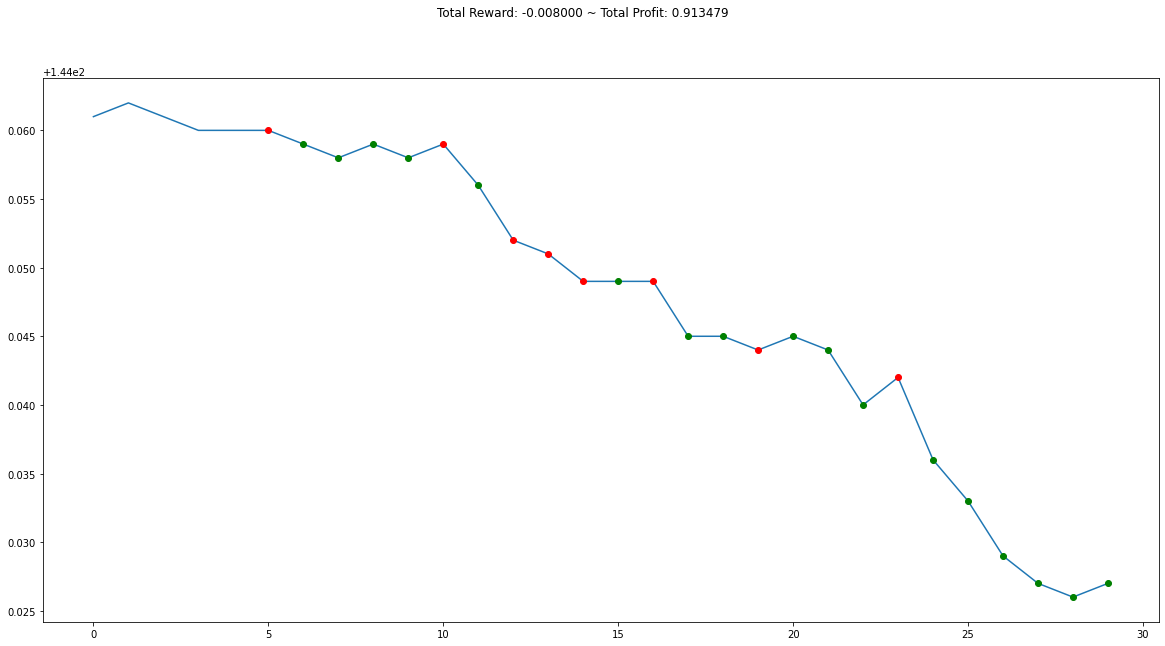

In [ ]:
# visualizes this environment
plt.figure(figsize=(20,10))
plt.cla()
env.render_all()
plt.show()

# "To summarize this section, we are taking a bunch of random steps in our environment and visualizing it"

In [ ]:
#!pip install "gym==0.19.0" # older version to fix  'gym.logger' has no attribute 'MIN_LEVEL'

In [ ]:
# Training an RL agent to trade
env_build = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)
# wrapping our environment inside the dummy vectorized environment wrapper
env = DummyVecEnv([env_build])

# A2C algorithm; Advantage Actor-Critic, Policy-Based and Value-Based RL 

# https://towardsdatascience.com/advantage-actor-critic-tutorial-mina2c-7a3249962fc8 on A2C
# "MlpLstmPolicy which is a deep neural network policy with an LSTM layer."
model_train = A2C('MlpLstmPolicy', env, verbose=1) 
model_train.learn(total_timesteps=100000)
'''
 Ideally, what you need to observe while training is the explained_variance value. 
 You want it to be as high as possible. We are looking at values between 0 and 1

 You should also make sure the value_loss is as low as possible

 You can stop the model training when the explained_variance is 0.966.
'''


---------------------------------
| explained_variance | -0.869   |
| fps                | 385      |
| nupdates           | 18900    |
| policy_entropy     | 0.693    |
| total_timesteps    | 94500    |
| value_loss         | 2.52e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.0498   |
| fps                | 385      |
| nupdates           | 19000    |
| policy_entropy     | 0.693    |
| total_timesteps    | 95000    |
| value_loss         | 3.81e-06 |
---------------------------------
---------------------------------
| explained_variance | 0.158    |
| fps                | 385      |
| nupdates           | 19100    |
| policy_entropy     | 0.692    |
| total_timesteps    | 95500    |
| value_loss         | 1.85e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.053   |
| fps                | 385      |
| nupdates           | 19200    |
| policy_entropy     | 0.693    |
| total_timest

'\n Ideally, what you need to observe while training is the explained_variance value. \n You want it to be as high as possible. We are looking at values between 0 and 1\n\n You should also make sure the value_loss is as low as possible\n\n ou can stop the model training when the explained_variance is 0.966.\n'

In [ ]:
# Testing the RL-agent
env = gym.make('stocks-v0', df=df, frame_bound=(25,35), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model_train.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
'''
instead of taking random actions, we are using our model to predict which action it should take, i.e., buy or sell.
'''

info {'total_reward': 0.0, 'total_profit': 0.9850636786852466, 'position': 1}


'\ninstead of taking random actions, we are using our model to predict which action it should take, i.e., buy or sell.\n'

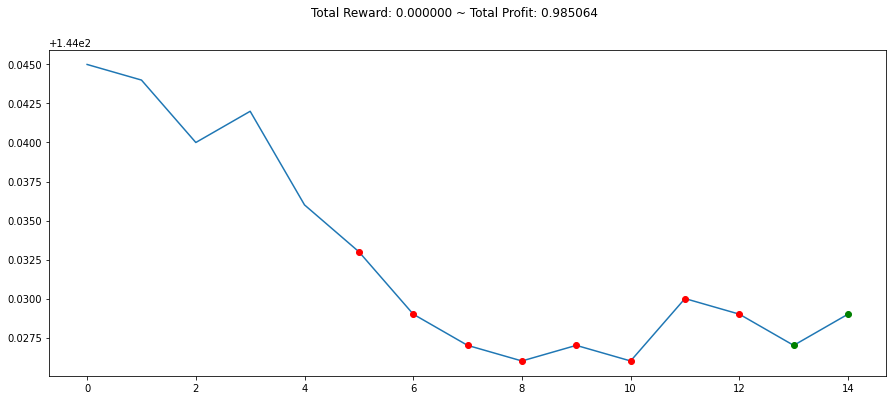

In [ ]:
# visualize results

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# "green dots represent buying while the red dots represent selling "